In [1]:
import pandas as pd

In [2]:
data= pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/FeatureEngineering/1_outliers/Exercise/AB_NYC_2019.csv")

In [3]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
data.shape

(48895, 16)

In [5]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [7]:
data['price'].quantile(0.95)

355.0

In [16]:
min_threshold, max_threshold =data['price'].quantile([0.05,0.999])
min_threshold, max_threshold 

(40.0, 3000.0)

In [35]:
data[(data['price']>=max_threshold)|(data['price']<=min_threshold)].price.count()

2866

In [36]:
data_without_outlier=data[(data['price']<max_threshold)&(data['price']>min_threshold)]

In [37]:
data_without_outlier.shape

(46029, 16)

In [38]:
no_of_outlier = data.shape[0]-data_without_outlier.shape[0]

In [34]:
no_of_outlier

2866

In [39]:
data_without_outlier.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.602900e+04,4.602900e+04,46029.000000,46029.000000,46029.000000,46029.000000,46029.000000,36656.000000,46029.000000,46029.000000
mean,1.885700e+07,6.625928e+07,40.729754,-73.953792,153.991744,6.930978,23.643529,1.377729,7.239458,112.634165
std,1.102960e+07,7.829093e+07,0.053421,0.045025,155.195268,20.771916,44.996175,1.679971,33.774000,131.322179
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,41.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.261392e+06,7.465567e+06,40.691290,-73.983810,75.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.945706e+07,2.946139e+07,40.724180,-73.956920,115.000000,2.000000,5.000000,0.720000,1.000000,45.000000
75%,2.903736e+07,1.052701e+08,40.763320,-73.938720,180.000000,5.000000,24.000000,2.030000,2.000000,226.000000
max,3.648724e+07,2.743213e+08,40.911690,-73.712990,2999.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [52]:
data_without_outlier.sample(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
41492,32244865,LARGE Trendy Studio!!!,53931758,Lc,Brooklyn,Flatbush,40.64464,-73.96453,Entire home/apt,100,3,3,2019-06-03,0.97,1,73
24479,19699039,Super Nice and Cool One Bedroom in LES,24835386,Atif,Manhattan,Lower East Side,40.71799,-73.98657,Entire home/apt,138,7,4,2018-08-27,0.17,1,0
39337,30692246,Private room 1 block from M train in Ridgewood,84011138,Aimar,Queens,Ridgewood,40.70792,-73.89546,Private room,55,3,7,2019-07-07,1.08,1,188
27212,21504532,Beautiful apartment direct in Midtown Manhattan,156246842,Sandra,Manhattan,Hell's Kitchen,40.76254,-73.98812,Private room,150,3,54,2019-06-22,2.67,3,24
22244,17938337,10 Minutes away from JFK Airport,96841679,Kathleen,Brooklyn,Canarsie,40.63716,-73.88654,Entire home/apt,85,2,96,2019-06-22,3.70,1,340


In [53]:
data_without_outlier.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

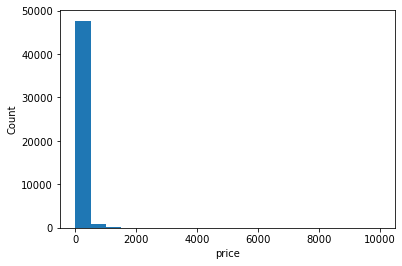

In [65]:
plt.hist(data['price'],bins=20)
plt.xlabel('price')
plt.ylabel('Count')
plt.show()

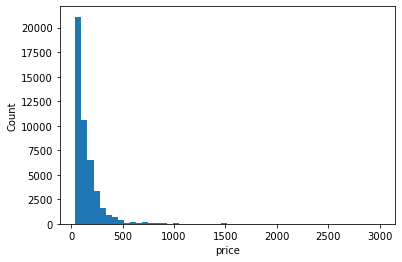

In [64]:
plt.hist(data_without_outlier['price'],bins=50)
plt.xlabel('price')
plt.ylabel('Count')
plt.show()